In [35]:
import numpy as np
import pandas as pd

In [36]:
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [38]:
data.shape

(62760, 3)

In [39]:
data.columns = ['Total','West', 'East']

In [40]:
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [41]:
data.dropna().describe()

,Total,West,East
count,62750.000000,62750.000000,62750.000000
mean,114.693163,52.726948,61.966215
std,145.818044,67.595710,90.692425
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,75.000000
max,1097.000000,698.000000,850.000000


数据可视化

In [42]:
%matplotlib inline
import seaborn
seaborn.set()

Text(0,0.5,'Hourly Bicycle Count')

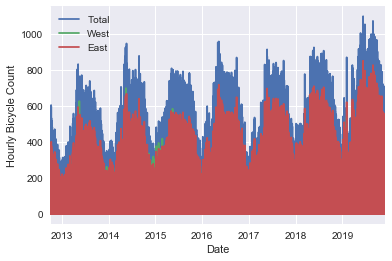

In [43]:
import matplotlib.pyplot as plt
data.plot()
plt.ylabel("Hourly Bicycle Count")

上述时间粒度太细，看不出趋势，重新取样成较大的时间粒度

按周累计上述数据，重新绘图

Text(0,0.5,'Weekly  bicycle count')

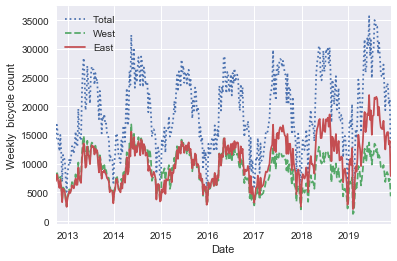

In [44]:
weekly = data.resample("W").sum()
weekly.plot(style=[':','--','-'])
plt.ylabel("Weekly  bicycle count")

另一种对数据进行累计的简便方法

计算30天的移动平均值

In [45]:
daily = data.resample("D").sum()

Text(0,0.5,'mean of 30 days count')

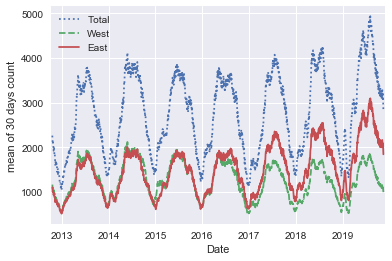

In [46]:
daily.rolling(30, center=True).mean().plot(style=[':','--','-'])
plt.ylabel("mean of 30 days count")

使用移动平均 来平滑曲线

高斯分布时间窗口

窗口宽度=50天
窗口内高斯平滑宽度=10天

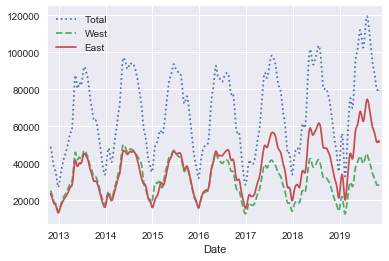

In [47]:
daily.rolling(50, center=True,
             win_type="gaussian").sum(std=10).plot(style=[':','--','-'])

后续代码不再展示，查看《python数据科学手册》P182
后面还对
- 每小时的自行车流量
- 每周每天的自行车流量
- 工作日，双休日每小时的自行车流量

做了分析，主要用到了数据透视 groupby 操作